<a href="https://colab.research.google.com/github/rubanzasilva/tabular-playground/blob/main/tabularPlayground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import seaborn as sns
from pathlib import Path
import PIL
import json
from pathlib import Path

In [1]:
!pip install fastcore fastai --upgrade

     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 189 kB 10.2 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
from fastai.tabular.all import *

In [5]:
!git clone https://github.com/rubanzasilva/tabular-playground-dataset.git


Cloning into 'tabular-playground-dataset'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 3), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [4]:
!ls 

sample_data


In [6]:
!unzip tabular-playground-dataset/tabular-playground-series-mar-2022.zip

Archive:  tabular-playground-dataset/tabular-playground-series-mar-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
path = Path('')
path

Path('.')

In [8]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
train_df.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


FEATURE ENGINEERING

In [8]:
print('train_df.info()'); print(train_df.info(), '\n')
print('test_df.info()'); print(test_df.info(), '\n')
#non-null value check


train_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB
None 

test_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   row_id     2340 non-null   int64 
 1   time       2340 non-null   object
 2   x          2340 non-null   int64 
 3   y          2340 non-null   int64 
 4   direction  2340 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.5+ KB
None 



In [9]:
#unique value check
def print_unique_category(df, column):
    print(f'unique_category_number: {df[column].nunique()}')
    print(f'cagetories: {df[column].unique()}')
    print()

# categories in train_df
print_unique_category(train_df, 'direction')
print_unique_category(train_df, 'x')
print_unique_category(train_df, 'y')

unique_category_number: 8
cagetories: ['EB' 'NB' 'SB' 'WB' 'NE' 'SW' 'NW' 'SE']

unique_category_number: 3
cagetories: [0 1 2]

unique_category_number: 4
cagetories: [0 1 2 3]



In [ ]:
#drop row_id as its the same as index
train_df = train_df.drop(['row_id'], axis=1)
#test_df = test_df.drop(['row_id'], axis=1)

In [10]:
train_df

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [9]:
add_datepart(train_df, "time", drop=False)

,row_id,time,x,y,direction,congestion,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,0,1991-04-01 00:00:00,0,0,EB,70,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
1,1,1991-04-01 00:00:00,0,0,NB,49,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
2,2,1991-04-01 00:00:00,0,0,SB,24,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
3,3,1991-04-01 00:00:00,0,1,EB,18,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
4,4,1991-04-01 00:00:00,0,1,NB,60,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0
848831,848831,1991-09-30 11:40:00,2,3,NE,28,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0
848832,848832,1991-09-30 11:40:00,2,3,SB,68,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0
848833,848833,1991-09-30 11:40:00,2,3,SW,17,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0


In [10]:

add_datepart(test_df, "time", drop=False)

,row_id,time,x,y,direction,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,848835,1991-09-30 12:00:00,0,0,EB,1991,9,40,30,0,273,True,False,True,False,False,False,686232000.0
1,848836,1991-09-30 12:00:00,0,0,NB,1991,9,40,30,0,273,True,False,True,False,False,False,686232000.0
2,848837,1991-09-30 12:00:00,0,0,SB,1991,9,40,30,0,273,True,False,True,False,False,False,686232000.0
3,848838,1991-09-30 12:00:00,0,1,EB,1991,9,40,30,0,273,True,False,True,False,False,False,686232000.0
4,848839,1991-09-30 12:00:00,0,1,NB,1991,9,40,30,0,273,True,False,True,False,False,False,686232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,851170,1991-09-30 23:40:00,2,3,NB,1991,9,40,30,0,273,True,False,True,False,False,False,686274000.0
2336,851171,1991-09-30 23:40:00,2,3,NE,1991,9,40,30,0,273,True,False,True,False,False,False,686274000.0
2337,851172,1991-09-30 23:40:00,2,3,SB,1991,9,40,30,0,273,True,False,True,False,False,False,686274000.0
2338,851173,1991-09-30 23:40:00,2,3,SW,1991,9,40,30,0,273,True,False,True,False,False,False,686274000.0


In [11]:
train_df.columns


Index(['row_id', 'time', 'x', 'y', 'direction', 'congestion', 'timeYear',
       'timeMonth', 'timeWeek', 'timeDay', 'timeDayofweek', 'timeDayofyear',
       'timeIs_month_end', 'timeIs_month_start', 'timeIs_quarter_end',
       'timeIs_quarter_start', 'timeIs_year_end', 'timeIs_year_start',
       'timeElapsed'],
      dtype='object')

In [ ]:
train_df

In [13]:
train_df.to_csv(path/'train_clean.csv')
test_df.to_csv(path/'test_clean.csv')

In [12]:
train_df.to_pickle(path/'train_clean')
test_df.to_pickle(path/'test_clean')

In [14]:
!ls

sample_data	       tabular-playground-dataset  test.csv	    train.csv
sample_submission.csv  test_clean.csv		   train_clean.csv


categorical-direction,x,y
continuos- row-id,time,congestion


In [13]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')
train_df.head()

,row_id,time,x,y,direction,congestion,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,0,1991-04-01,0,0,EB,70,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
1,1,1991-04-01,0,0,NB,49,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
2,2,1991-04-01,0,0,SB,24,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
3,3,1991-04-01,0,1,EB,18,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
4,4,1991-04-01,0,1,NB,60,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0


In [14]:
train_df

,row_id,time,x,y,direction,congestion,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,0,1991-04-01 00:00:00,0,0,EB,70,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
1,1,1991-04-01 00:00:00,0,0,NB,49,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
2,2,1991-04-01 00:00:00,0,0,SB,24,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
3,3,1991-04-01 00:00:00,0,1,EB,18,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
4,4,1991-04-01 00:00:00,0,1,NB,60,1991,4,14,1,0,91,False,True,False,True,False,False,670464000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0
848831,848831,1991-09-30 11:40:00,2,3,NE,28,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0
848832,848832,1991-09-30 11:40:00,2,3,SB,68,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0
848833,848833,1991-09-30 11:40:00,2,3,SW,17,1991,9,40,30,0,273,True,False,True,False,False,False,686230800.0


In [16]:
dls = TabularDataLoaders.from_df(df=train_df, path=path, y_names="congestion",
    cat_names = ['x','y','direction','time','timeYear',
       'timeMonth', 'timeWeek', 'timeDay', 'timeDayofweek', 'timeDayofyear',
       'timeIs_month_end', 'timeIs_month_start', 'timeIs_quarter_end',
       'timeIs_quarter_start', 'timeIs_year_end', 'timeIs_year_start',
       'timeElapsed'],
    cont_names=['row_id'],
    procs = [Categorify, FillMissing, Normalize])

In [17]:
learn = tabular_learner(dls, metrics=mae)

In [18]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(5, 4)
    (2): Embedding(9, 5)
    (3): Embedding(13060, 323)
    (4): Embedding(2, 2)
    (5): Embedding(7, 5)
    (6): Embedding(28, 10)
    (7): Embedding(32, 11)
    (8): Embedding(8, 5)
    (9): Embedding(184, 30)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(2, 2)
    (15): Embedding(2, 2)
    (16): Embedding(13060, 323)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=738, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNor

SuggestedLRs(valley=0.015848932787775993)

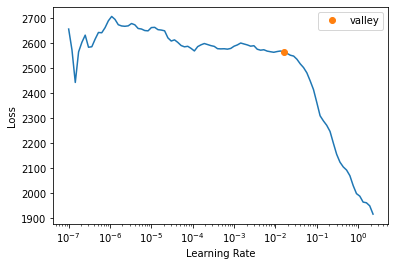

In [19]:
learn.lr_find()

In [23]:
learn.fit_one_cycle(20, 1e-2 ,wd=0.1)

epoch,train_loss,valid_loss,mae,time


KeyboardInterrupt: ignored

In [ ]:
learn.show_results()

,x,y,direction,time,timeElapsed,timeIs_year_end,timeMonth,timeDayofweek,timeIs_month_start,timeIs_quarter_end,timeIs_year_start,timeDay,timeIs_month_end,timeIs_quarter_start,timeYear,timeWeek,row_id,timeDayofyear,congestion,congestion_pred
0,3.0,3.0,7.0,5527.0,0.309364,0.0,-0.287585,-1.488795,-0.185472,-0.091179,0.0,0.149105,-0.176116,-0.105863,0.0,-0.199515,-0.265194,-0.256253,46.0,48.611382
1,3.0,2.0,3.0,6638.0,0.557588,0.0,0.302024,-0.990557,-0.185472,-0.091179,0.0,-1.556340,-0.176116,-0.105863,0.0,0.066854,0.029517,0.029014,21.0,19.127487
2,1.0,1.0,1.0,5047.0,0.201214,0.0,-0.287585,-1.488795,-0.185472,-0.091179,0.0,-0.646769,-0.176116,-0.105863,0.0,-0.332700,-0.392776,-0.389377,40.0,42.289429
3,2.0,3.0,1.0,3324.0,-0.184186,0.0,-0.877195,0.504158,-0.185472,-0.091179,0.0,0.149105,-0.176116,-0.105863,0.0,-0.865438,-0.849795,-0.845804,80.0,75.582390
4,3.0,2.0,5.0,12317.0,1.837598,0.0,1.481243,0.504158,-0.185472,-0.091179,0.0,0.490193,-0.176116,-0.105863,0.0,1.531885,1.536222,1.550438,25.0,35.333771
5,2.0,2.0,8.0,10761.0,1.481678,0.0,0.891634,-0.492319,-0.185472,-0.091179,0.0,1.399763,-0.176116,-0.105863,0.0,1.132331,1.123313,1.113029,52.0,53.848576
6,3.0,2.0,4.0,9088.0,1.105643,0.0,0.891634,-1.488795,-0.185472,-0.091179,0.0,-1.215251,-0.176116,-0.105863,0.0,0.732777,0.679531,0.675619,29.0,29.688305
7,1.0,4.0,7.0,6497.0,0.526082,0.0,-0.287585,1.500634,-0.185472,10.967385,0.0,1.627156,5.678059,-0.105863,0.0,-0.066330,-0.008014,-0.009021,31.0,26.151936
8,2.0,1.0,8.0,4791.0,0.144017,0.0,-0.287585,0.005920,-0.185472,-0.091179,0.0,-1.101554,-0.176116,-0.105863,0.0,-0.465884,-0.460605,-0.465448,40.0,37.871815


Saving model, loading and retraining

In [ ]:
learn.save('2')

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.recorder.plot_sched()

In [ ]:
learn.load('2');

In [ ]:
learn.fit_one_cycle(5, 2e-4)

Making predictions on test set test_dl method of the DataLoaders.

Learner.get_preds will give you the predictions

In [ ]:
test_df.head()

In [ ]:
test_dl = learn.dls.test_dl(test_df)
pred = learn.get_preds(dl=test_dl)
pred

In [ ]:

pred

In [ ]:
learn.show_results()

,x,y,direction,time,timeElapsed,timeIs_year_end,timeMonth,timeDayofweek,timeIs_month_start,timeIs_quarter_end,timeIs_year_start,timeDay,timeIs_month_end,timeIs_quarter_start,timeYear,timeWeek,row_id,timeDayofyear,congestion,congestion_pred
0,1.0,4.0,2.0,11079.0,1.555402,0.0,1.481243,-1.488795,-0.185472,-0.091179,0.0,-1.556340,-0.176116,-0.105863,0.0,1.265516,1.207625,1.208118,36.0,32.479958
1,1.0,1.0,5.0,2918.0,-0.274903,0.0,-0.877195,1.002396,-0.185472,-0.091179,0.0,-0.533073,-0.176116,-0.105863,0.0,-0.998623,-0.957613,-0.959911,54.0,46.974449
2,2.0,3.0,1.0,10287.0,1.374874,0.0,0.891634,0.005920,-0.185472,-0.091179,0.0,0.717586,-0.176116,-0.105863,0.0,0.999146,0.997560,0.998922,61.0,60.446823
3,3.0,2.0,7.0,9288.0,1.150328,0.0,0.891634,0.005920,-0.185472,-0.091179,0.0,-0.874162,-0.176116,-0.105863,0.0,0.732777,0.732605,0.732673,46.0,48.796761
4,3.0,2.0,4.0,7544.0,0.760006,0.0,0.302024,-1.488795,-0.185472,-0.091179,0.0,-0.078288,-0.176116,-0.105863,0.0,0.333223,0.269892,0.276246,12.0,28.959995
5,3.0,3.0,8.0,12737.0,1.933892,0.0,1.481243,0.005920,-0.185472,-0.091179,0.0,1.172371,-0.176116,-0.105863,0.0,1.665069,1.647697,1.664545,48.0,51.973934
6,3.0,2.0,1.0,1194.0,-0.663212,0.0,-1.466804,-0.492319,-0.185472,-0.091179,0.0,0.149105,-0.176116,-0.105863,0.0,-1.398177,-1.414840,-1.416338,75.0,78.142860
7,1.0,2.0,8.0,33.0,-0.922612,0.0,-1.466804,-1.488795,5.391646,-0.091179,0.0,-1.670036,-0.176116,9.446134,0.0,-1.664546,-1.723017,-1.720623,44.0,47.760437
8,1.0,4.0,2.0,4965.0,0.182899,0.0,-0.287585,1.500634,-0.185472,-0.091179,0.0,-0.760466,-0.176116,-0.105863,0.0,-0.465884,-0.414482,-0.408395,29.0,27.661880


In [ ]:
target_preds = pred[0]

test_df['congestion'] = target_preds

In [ ]:
test_df.to_csv(path/'submission.csv', columns=['row_id','congestion'], index=False)

In [ ]:
sub = pd.read_csv(path/'submission.csv')
sub.head()

In [ ]:
sample = pd.read_csv(path/'sample_submission.csv')
sample.head()

,row_id,congestion
0,848835,0.0
1,848836,0.0
2,848837,0.0
3,848838,0.0
4,848839,0.0


In [ ]:
preds = learn.get_preds()
pred_tensors = preds[0]
actual_labels = preds[1].numpy()

In [ ]:
pred_tensors, actual_labels

total_to_test = 20000
correct = 0
for i in range(total_to_test):
    if(pred_tensors[i][0] > 0.5 and actual_labels[i] == 0):
        correct = correct + 1

print(f"{correct}/{total_to_test} correct")

In [20]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"5edc75fbf33375a2baf7488f8b05ccc0"}'}

In [21]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [22]:
# This permissions change avoids a warning on Kaggle tool startup.
#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

kaggle.json  sample_submission.csv	 test_clean   train.csv
models	     submission.csv		 test.csv
sample_data  tabular-playground-dataset  train_clean


In [ ]:
!rm kaggle.json

In [ ]:
!kaggle competitions submit -c tabular-playground-series-mar-2022 -f submission.csv -m "Message"


In [ ]:
learn

In [ ]:
learn.fit_one_cycle(5, 2e-4)

In [ ]:
learn.fit_one_cycle(5, 1e-4)

In [ ]:
learn.fit_one_cycle(5, 1e-4)

In [ ]:
learn.save('1')

datepart-fe

In [ ]:
learn.load('1');

In [ ]:
!ls models

1.pth


SuggestedLRs(valley=0.0002290867705596611)

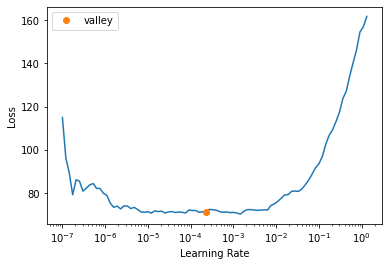

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, 0.0002290867705596611)

epoch,train_loss,valid_loss,mae,time
0,32.993137,124.702316,8.134151,03:31
1,54.214725,119.876984,7.939443,03:18
2,66.958023,113.594795,7.734018,03:19
3,64.370476,114.161896,7.724749,03:19
4,57.532352,118.034271,7.860860,03:18
5,46.116886,116.460350,7.787792,03:17
6,35.396286,117.330933,7.847105,03:17
7,27.070164,117.870071,7.849110,03:18
8,19.242472,117.919044,7.871027,03:33
9,16.848783,119.042816,7.904485,03:17
